In [62]:
import geopandas

,id,type,lat,lon,timestamp,effect,description,solved,solved_time,geometry
0,1.0,1,None,None,2022-03-07T10:27:13,5,None,False,None,POINT (31.47728 30.04280)
1,NaN,2,None,None,2022-03-06T00:00:00,3,SH1,True,2022-03-08T11:08:13,POINT (31.62430 30.13048)


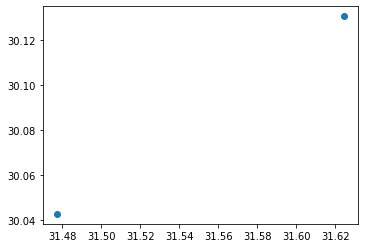

In [63]:
pint = geopandas.read_file("../Data/NewCairoPointsDemo/NewCairoPointsDemo.gpkg", layer='NewCairoPointsDemo')
pint.plot()
pint.head()

In [64]:
pint.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"description": null, "effect": 5, "id": 1.0, "lat": null, "lon": null, "solved": false, "solved_time": null, "timestamp": "2022-03-07T10:27:13", "type": 1}, "geometry": {"type": "Point", "coordinates": [31.47728173552867, 30.042802808846783]}}, {"id": "1", "type": "Feature", "properties": {"description": "SH1", "effect": 3, "id": null, "lat": null, "lon": null, "solved": true, "solved_time": "2022-03-08T11:08:13", "timestamp": "2022-03-06T00:00:00", "type": 2}, "geometry": {"type": "Point", "coordinates": [31.62429896952351, 30.130480795087898]}}]}'

,ADM3_EN,ADM3_AR,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM3ALT1AR,ADM3ALT2AR,ADM2_EN,ADM2_AR,...,ADM1_PCODE,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,None,اسكان مبارك للشباب,EG013902,None,None,None,None,None,New Cairo-3,قسم ثالث القاهرة الجديدة,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.146695,0.000691,"POLYGON ((31.44780 29.97539, 31.42257 29.97428..."
1,None,اكاديميه الشرطه و الميراج,EG013803,None,None,None,None,None,New Cairo-2,قسم ثان القاهرة الجديدة,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.155351,0.001301,"POLYGON ((31.45107 30.07614, 31.44928 30.07136..."
2,None,الانشطه,EG013903,None,None,None,None,None,New Cairo-3,قسم ثالث القاهرة الجديدة,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.140649,0.000837,"POLYGON ((31.41760 29.99413, 31.41831 29.98809..."
3,None,التجمع الخامس,EG013701,None,None,None,None,None,New Cairo-1,قسم أول القاهرة الجديدة,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.140995,0.001107,"POLYGON ((31.44686 29.99994, 31.44698 29.99460..."
4,None,الرحاب و المستثمرون,EG013801,None,None,None,None,None,New Cairo-2,قسم ثان القاهرة الجديدة,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.268155,0.002957,"POLYGON ((31.52336 30.04530, 31.52241 30.04456..."


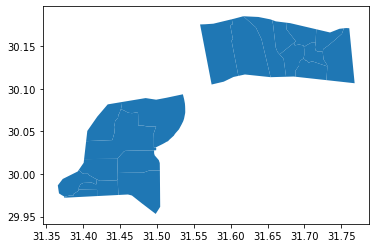

In [65]:
poly = geopandas.read_file("../Data/NewCairoPolyDemo/NewCairoPolyDemo.shp")
poly.plot()
poly.head()

In [66]:
geopandas.sjoin(pint, poly[['ADM3_AR', 'geometry']], how='left')

,id,type,lat,lon,timestamp,effect,description,solved,solved_time,geometry,index_right,ADM3_AR
0,1.0,1,None,None,2022-03-07T10:27:13,5,None,False,None,POINT (31.47728 30.04280),8,الياسمين و البنفسج و المثتس
1,NaN,2,None,None,2022-03-06T00:00:00,3,SH1,True,2022-03-08T11:08:13,POINT (31.62430 30.13048),15,شياخة الشروق 2


In [67]:
geopandas.sjoin_nearest(pint, poly, how='inner', max_distance=5,lsuffix='left')

,id,type,lat,lon,timestamp,effect,description,solved,solved_time,geometry,...,ADM1_AR,ADM1_PCODE,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area
0,1.0,1,None,None,2022-03-07T10:27:13,5,None,False,None,POINT (31.47728 30.04280),...,القاهرة,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.293443,0.002997
1,NaN,2,None,None,2022-03-06T00:00:00,3,SH1,True,2022-03-08T11:08:13,POINT (31.62430 30.13048),...,القاهرة,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.214647,0.002595


In [75]:
import folium
import pandas as pd

In [76]:
coordinateslist = pint['geometry'].tolist()
df1 = pd.DataFrame(coordinateslist)
print(df1)

                                              0
0  POINT (31.47728173552867 30.042802808846783)
1  POINT (31.62429896952351 30.130480795087898)


In [77]:
result = df1.transpose()
print(result)

                                              0  \
0  POINT (31.47728173552867 30.042802808846783)   

                                              1  
0  POINT (31.62429896952351 30.130480795087898)  


In [80]:
poly.explore()